In [0]:
#################################
## Describes the rectangle map ##
## - S - Start point           ##
## - E - End point             ##
## - # - Wall                  ##
#################################
MAP = [
    ".............",
    "..#..........",
    "..#...#......",
    "..#.E.#......",
    "..#####......",
    "S............",
]

In [0]:
### Describes model of Map

class SquareGrid:
    
    def __init__(self, string_map):
        self.string_map = string_map
        self.end_position = None
        self.start_position = None
        self.walls = []
        self.height = len(string_map)
        self.width  = len(string_map[0])
        
        ## Validate input
        for i in range(0, self.height):
            if(len(string_map[i]) != self.width):
                 raise Exception("Map does not have correct size")
            for j in range(0, self.width):
                if(string_map[i][j] == "#"):
                    self.walls.append((i, j))
                if(string_map[i][j] == "S"):
                    self.start_position = (i, j)
                if(string_map[i][j] == "E"):
                    self.end_position = (i, j)
        if(self.end_position == None or self.start_position == None):
            raise Exception("Map does not have 'Start' or 'End' Positions")
            
    
    def in_bounds(self, id):
        (x, y) = id
        return 0 <= x < self.width and 0 <= y < self.height
    
    def passable(self, id):
        return id not in self.walls
    
    def neighbors(self, id):
        (x, y) = id
        results = [(x+1, y), (x, y-1), (x-1, y), (x, y+1)]

        results = filter(self.in_bounds, results)
        results = filter(self.passable, results)
        return results
    
    def cost(self, current, next):
        return 1
    
        
    def get_start_end_positions(self):
        return self.start_position, self.end_position;
    
    def draw(self, path = []):
        new_map = []
        # Fill empty
        for x in range(self.height):
            new_map.append("." * self.width)

        # Draw Walls
        for x in self.walls:
            (i, j) = x
            row = list(new_map[i])
            row[j] = "#"
            new_map[i] = "".join(row)

        # Draw Path
        for x in path:
            (i, j) = x
            row = list(new_map[i])
            row[j] = "x"
            new_map[i] = "".join(row)
        
        # Draw Start end End  Point
        (i, j) = self.start_position
        row = list(new_map[i])
        row[j] = "S"
        new_map[i] = "".join(row)

        (i, j) = self.end_position
        row = list(new_map[i])
        row[j] = "E"
        new_map[i] = "".join(row)

        # Draw Map
        for i in new_map:
            print(i)


In [3]:
### Create a Map and draw it
g = SquareGrid(MAP)
g.draw()

.............
..#..........
..#...#......
..#.E.#......
..#####......
S............


In [0]:
### Queue with priority
import heapq

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self):
        return len(self.elements) == 0
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

In [0]:
### Heuristic function for accounting in cost
def heuristic(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2)**2 + (y1 - y2)**2)**.5

### A Star Search algorithm
def a_star_search(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    counter = 0
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == goal:
            break

        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost + heuristic(goal, next)
                frontier.put(next, priority)
                came_from[next] = current
                counter += 1   
    
    return came_from, cost_so_far, counter

### Finds the way between points according to dictionary
def build_path(came_from, start, goal):
    result = []
    item = goal
    result.append(item)
    while (item != start):
        item = came_from.get(item)
        if(item == None):
            raise Exception('There is no path')
        result.append(item);
    
    return result[::-1]; 

In [6]:
### Run Search
start, goal = g.get_start_end_positions()
came_from, cost_so_far, counter = a_star_search(g, start, goal)

### Build Path
path = build_path(came_from, start, goal)
path.remove(start)
path.remove(goal)

### See result
print(g.get_start_end_positions())
print(path)


((5, 0), (3, 4))
[(5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 4)]


In [7]:
counter

51

In [8]:
### Draw Path
g.draw(path)

.xxx.........
.x#x.........
.x#xx.#......
.x#.E.#......
.x#####......
Sx...........


In [0]:
######################
# Dijkstra vs A-Star #
######################

def dijkstra_search(graph, start, goal):
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from = {}
    cost_so_far = {}
    came_from[start] = None
    cost_so_far[start] = 0
    counter = 0
    
    while not frontier.empty():
        current = frontier.get()
        
        if current == goal:
            break
        
        for next in graph.neighbors(current):
            new_cost = cost_so_far[current] + graph.cost(current, next)
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                priority = new_cost
                frontier.put(next, priority)
                came_from[next] = current
                counter += 1

                    
    
    return came_from, cost_so_far, counter

In [10]:
### Run Search
start, goal = g.get_start_end_positions()
came_from, cost_so_far, counter = dijkstra_search(g, start, goal)

### Build Path
path = build_path(came_from, start, goal)
path.remove(start)
path.remove(goal)

### See result
print(g.get_start_end_positions())
print(path)


((5, 0), (3, 4))
[(4, 0), (3, 0), (2, 0), (1, 0), (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4)]


In [11]:
counter

70

In [12]:
g.draw(path)

xxxxx........
x.#.x........
x.#.x.#......
x.#.E.#......
x.#####......
S............


In [0]:
#################################
#      Dynamic Comparison       #
#################################
import random
STUB = ["E.S"]

x = []
y_a_start = []
y_deijksta = []

dim_max = 100

for i in range(5,dim_max):
    # Get number of corners
    corners = int(i ** 0.4)
    
    d = int(i/(corners + 1))
    #print('{} {} {}'.format(d, corners, i));
    graph = SquareGrid(STUB)
    graph.height = i
    graph.width  = i
    graph.start_position = (0, 0)
    graph.end_position   = (i-1, i-1)
    graph.walls = []

    for j in range (1, corners + 1):
        # graph add corner wall point
        st = j*d;
        graph.walls.append((st, st))    
        wall_len = random.randint(1, st)

        b = random.randint(0, 1);

        # horizontal wall
        for k in range(1, wall_len if b == 0 else st + 1):
            graph.walls.append((st, st - k)) 
        # vertical wall
        for k in range(1,wall_len if b == 1 else st + 1):
            graph.walls.append((st - k, st))
    
    x.append(i)
    start, goal = graph.get_start_end_positions()

    came_from, cost_so_far, counter = a_star_search(graph, start, goal)
    y_a_start.append(len(came_from))

    path = build_path(came_from, start, goal)
    path.remove(start)
    path.remove(goal)

    came_from, cost_so_far, counter = dijkstra_search(graph, start, goal)
    y_deijksta.append(len(came_from))
    path = build_path(came_from, start, goal)
    path.remove(start)
    path.remove(goal)

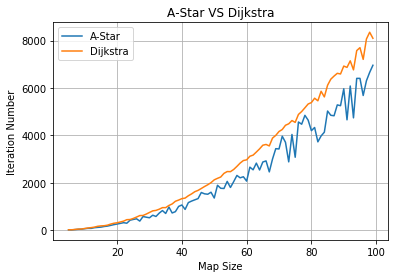

In [26]:
import matplotlib.pyplot as plt

plt.xlabel('Map Size')
plt.ylabel('Iteration Number')
plt.title('A-Star VS Dijkstra')
plt.plot(x, y_a_start, x, y_deijksta)
plt.legend(['A-Star','Dijkstra'])
plt.grid()
plt.savefig('a_star_dijkstra.svg')
plt.show()